In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv(r'C:\Users\ATHARVA\OneDrive\Desktop\gana\spotify dataset.csv')
df_cleaned = df.dropna(subset=['track_name', 'track_artist'])
audio_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[audio_features])
scaled_df = pd.DataFrame(scaled_features, columns=audio_features)


C:\Users\jitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Tempo Distribution')

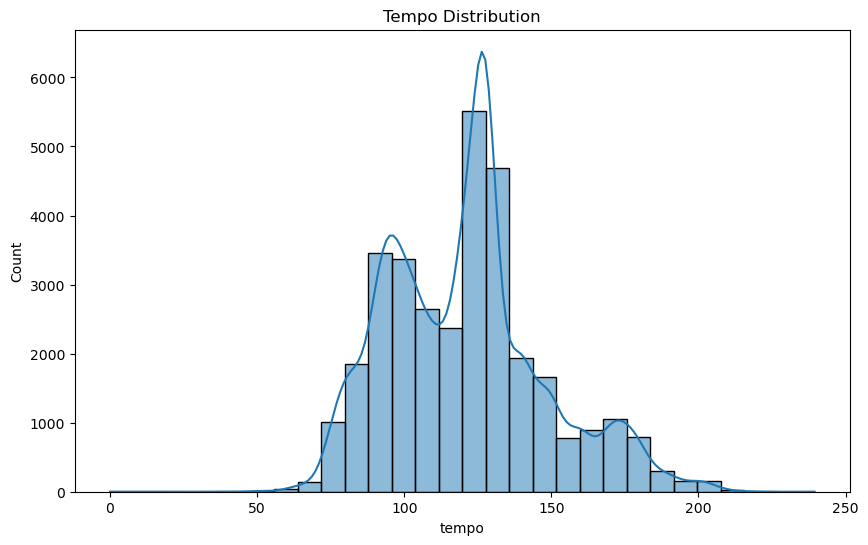

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of tempo and dance
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['tempo'], bins=30, kde=True)
plt.title('Tempo Distribution')


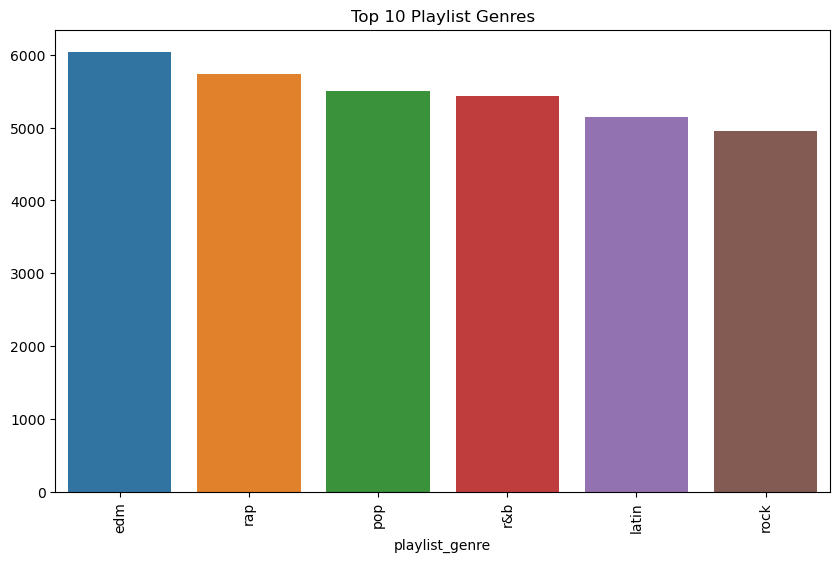

In [6]:
top_genres = df_cleaned['playlist_genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Playlist Genres')
plt.xticks(rotation=90)
plt.show()

C:\Users\jitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

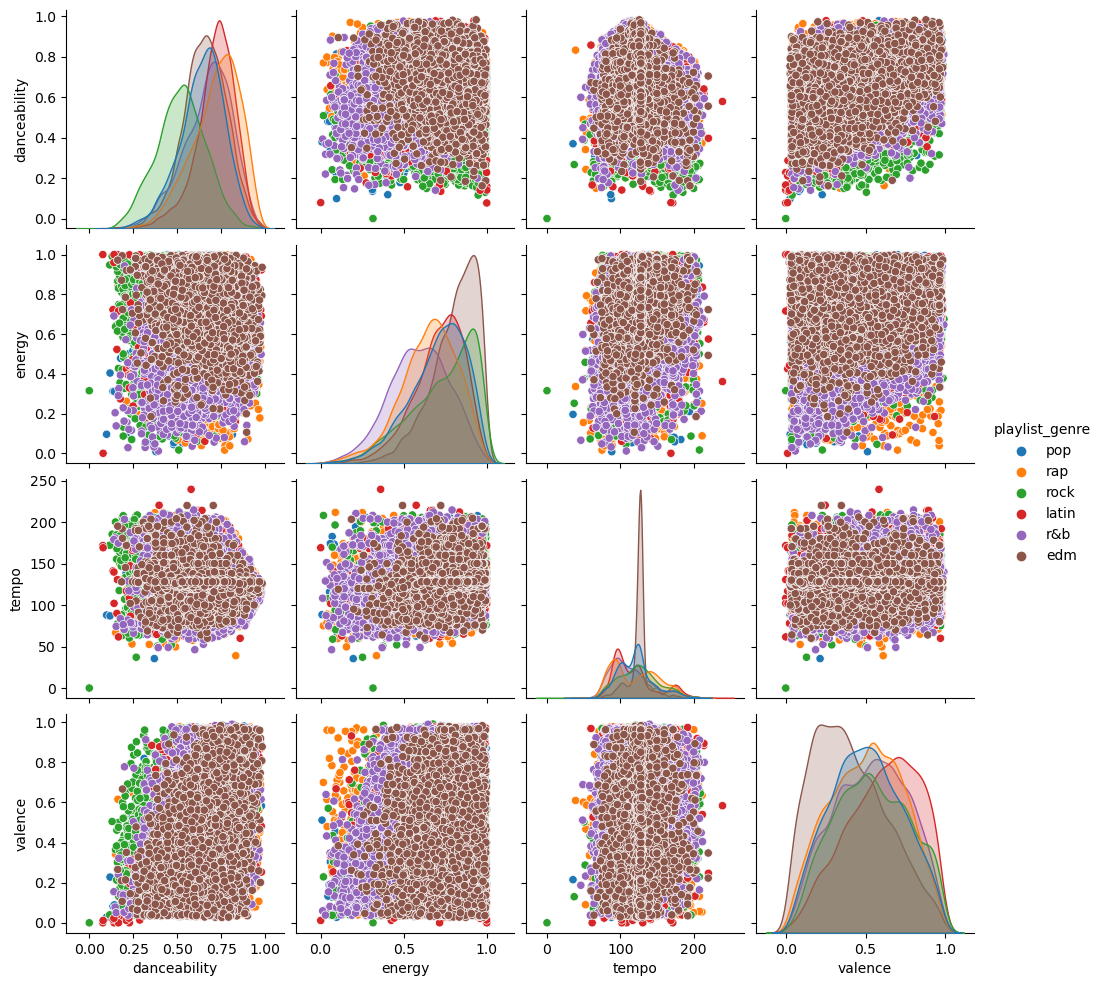

In [7]:
sns.pairplot(df_cleaned, hue='playlist_genre', vars=['danceability', 'energy', 'tempo', 'valence']) # Include all columns of df_cleaned and specify the columns to be used in the pairplot.
plt.show()

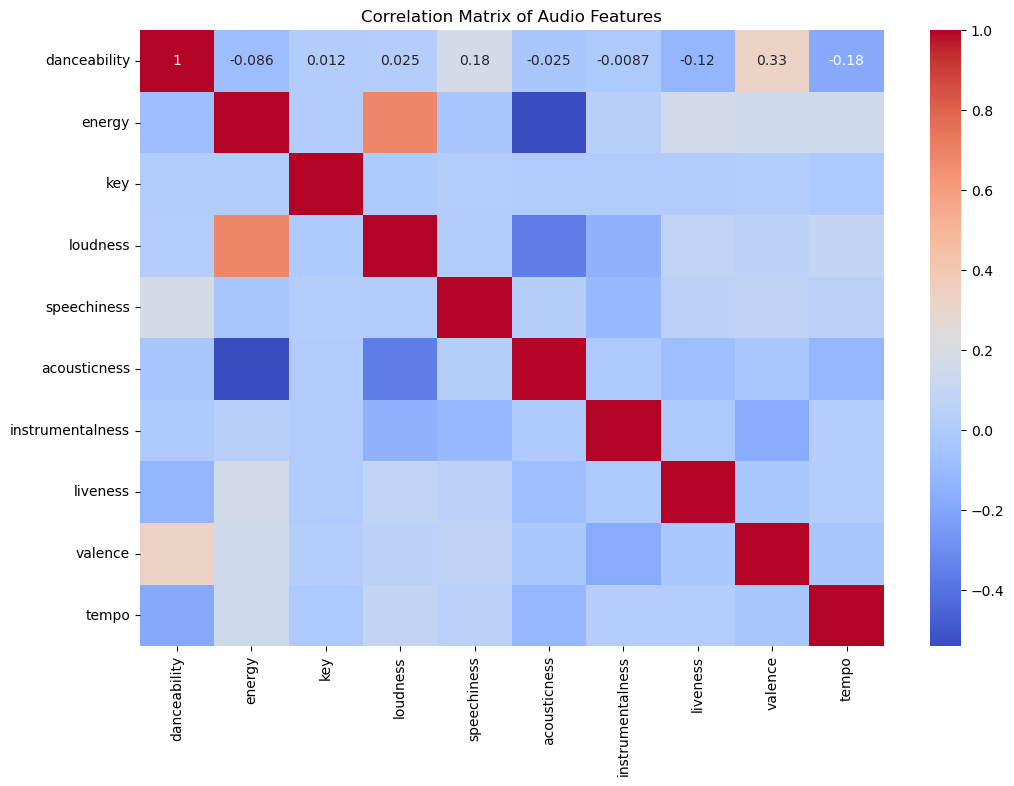

In [8]:
# correlation matrix
corr_matrix = scaled_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.show()

C:\Users\jitin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitin\AppData\Local\Temp\ipykernel_29632\3151034824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clusters'] = kmeans.fit_predict(scaled_features)


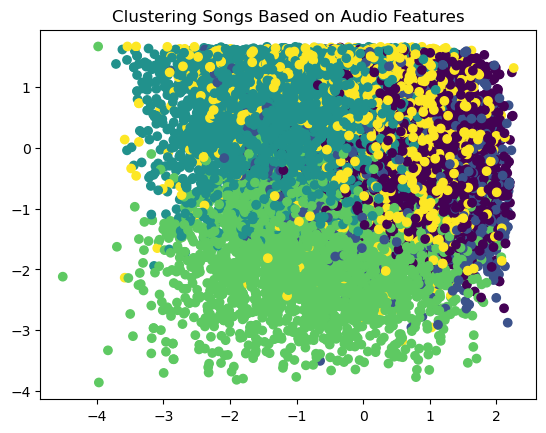

In [9]:
from sklearn.cluster import KMeans

# Applying K-means clustering
kmeans = KMeans(n_clusters=5)
df_cleaned['clusters'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=df_cleaned['clusters'], cmap='viridis')
plt.title('Clustering Songs Based on Audio Features')
plt.show()

In [10]:
from sklearn.neighbors import NearestNeighbors

# Fit the KNN model
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(scaled_features)

# Finding nearest neighbors for a specific song (you can use any row index)
distances, indices = knn.kneighbors([scaled_features[0]])

# Display recommended songs based on the first song in the dataset
recommended_songs = df_cleaned.iloc[indices[0]]
print("Recommended songs:")
print(recommended_songs[['track_name', 'track_artist', 'playlist_genre']])

Recommended songs:
                                              track_name track_artist  \
29684  I Don't Care (with Justin Bieber) - Loud Luxur...   Ed Sheeran   
0      I Don't Care (with Justin Bieber) - Loud Luxur...   Ed Sheeran   
28219                                        Another Day  Holl & Rush   
2371                    The Fox (What Does the Fox Say?)        Ylvis   
19639                                            Todavia  La Factoria   

      playlist_genre  
29684            edm  
0                pop  
28219            edm  
2371             pop  
19639          latin  
